In [8]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as Functional
import torch.optim as optim
%matplotlib inline

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root = './data', train = True,
                                       download = True, transform = transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root = './data', train = False,
                                       download = True, transform = transform)

testloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


 frog   dog plane  ship


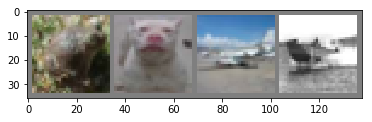

In [9]:
def imShow(img):
    # Denormalize
    img = img / 2 + 0.5
    npImg = img.numpy()
    plt.imshow(np.transpose(npImg, (1, 2, 0)))
    
# Get some random training images
dataIter = iter(trainloader)
images, labels = dataIter.next()

# Show Images
imShow(torchvision.utils.make_grid(images))

# Print Labels
print ' '.join('%5s' % classes[labels[j]] for j in range(4))

In [10]:
# Define CNN
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(Functional.relu(self.conv1(x)))
        x = self.pool(Functional.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = Functional.relu(self.fc1(x))
        x = Functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d (3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (conv2): Conv2d (6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120)
  (fc2): Linear(in_features=120, out_features=84)
  (fc3): Linear(in_features=84, out_features=10)
)


In [11]:
# Define Loss Function and Optimizer
# Will be using Stochastic Gradient Descent 
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

In [12]:
# Train the network
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get the inputs
        inputs, labels = data
        
        # Wrap in Variables
        inputs, labels = Variable(inputs), Variable(labels)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward + Backward + Optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # Stats
        running_loss += loss.data[0]
        if i % 2000 == 1999: 
            # Print every 2000th mini-batches
            print '[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000)
            running_loss = 0.0
            
print 'Training Done!'

[1,  2000] loss: 2.239
[1,  4000] loss: 1.884
[1,  6000] loss: 1.675
[1,  8000] loss: 1.542
[1, 10000] loss: 1.495
[1, 12000] loss: 1.444
[2,  2000] loss: 1.366
[2,  4000] loss: 1.351
[2,  6000] loss: 1.329
[2,  8000] loss: 1.297
[2, 10000] loss: 1.270
[2, 12000] loss: 1.259
Training Done!


Ground truth:   frog truck truck  deer


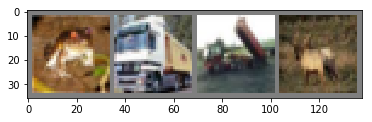

In [13]:
# Test the network
dataiter = iter(testloader)
images, labels = dataiter.next()

# Print images
imShow(torchvision.utils.make_grid(images))
print 'Ground truth: ', ' '.join('%5s'%classes[labels[j]] for j in range(4))

In [14]:
outputs = net(Variable(images))
_, predicted = torch.max(outputs.data, 1)
print 'Predicted: ', ' '.join('%5s'% classes[labels[j]] for j in range(4))

Predicted:   frog truck truck  deer


In [15]:
# Accuracy over whole dataset
correct = 0
total = 0
# Class wise accuracy
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1
    
print 'Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total)
for i in range(10):
    print 'Accuracy of %5s: %2d%%' % (classes[i], 100 * class_correct[i] / class_total[i])

Accuracy of the network on the 10000 test images: 57 %
Accuracy of plane: 59%
Accuracy of   car: 81%
Accuracy of  bird: 42%
Accuracy of   cat: 40%
Accuracy of  deer: 61%
Accuracy of   dog: 41%
Accuracy of  frog: 68%
Accuracy of horse: 58%
Accuracy of  ship: 72%
Accuracy of truck: 50%
